<a href="https://colab.research.google.com/github/markustoivonen/AIHealthTech2020/blob/master/exercises/unsupervised_learning_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Basic imports
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Model
import tensorflow.keras.layers as layers
import tensorflow_datasets as tfds
from sklearn.decomposition import PCA

In [2]:
"""
Example of learning to group similar data without labels.
This is called clustering. Here we use the K-means algorithm for clustering.
"""

# Here we import the data
# Tensorflow datasets and tensorflow.data has some free data which is easy to download
data = tfds.load("iris")
data = data['train']
X = np.concatenate([item['features'][None,:] for item in tfds.as_numpy(data)],0)
Y = np.array([item['label'] for item in tfds.as_numpy(data)])
# For this exercise we do 

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Shuffling and writing examples to /root/tensorflow_datasets/iris/2.0.0.incompleteUI6AH4/iris-train.tfrecord


Dataset iris downloaded and prepared to /root/tensorflow_datasets/iris/2.0.0. Subsequent calls will reuse this data.


In [3]:
"""
If we want to visualize the results, we need to reduce the dimensionality to 2 or 1
You don't need to worry about this too much. We will use PCA for the
dimensionality reduction:
"""
X = PCA(n_components=2).fit_transform(X)

# Unsupervised learning using the K-means algorithm

K-means works by initializing k-components and fitting them to the data, such that:


1.   Compute the distance from each component to each data-point
2.   Assign each data-point to the closest component
3.   Update the component as the mean of the data-points assigned to it.

Steps 1-3 are then continued until the components are not updated anymore.

In more mathematical terms: Let Let the data be: $X \in \mathbb{R}^{n \times d}$ and components be denoted as $c_i$, where $i\in\{1,2,\dots,k\}$. The components can be initialized as random values or randomly as some elements of $X$.

\begin{align*}
&\text{While not converged: }\\
S_j &= \{x : x \in X,~~ j = \text{argmin}_i ||x - c_i||_2\}\\
c_j &= \frac{1}{|S_j|} \sum_{x \in S_j}x
\end{align*}


In [4]:
# The number of clusters:
k = 3
# Initialize the clusters c_i as randomly some data_points. Use random number seed to reproduce results:
rng = np.random.RandomState(123)
C = rng.permutation(X)[0:k]
n,d = X.shape

# The distance is second norm but you can try other measures aswell.
def distance(vec1,vec2):
    return np.sqrt(np.sum((vec1-vec2)**2))

converged=False
while not converged:
    # Compute the distance between all the data and all the clusters.
    # Initialize array for holding the results:
    D = np.zeros((n,k))
    # You can loop over data and clusters, or do something more fancy if you wish
    for i in range(n):
        for j in range(k):
            D[i,j] = distance(X[i],C[j])

    # Now assing all the data to the cluster which is the closest:
    # Let's make a set S into which we pick the data:
    S = {}
    for j in range(k):
        S[j] = []
    
    # Put data into the set:
    for i in range(n):
        min_cluster_index = np.argmin(D[i,:])
        S[min_cluster_index].append(X[i,:])
    
    # Now compute the new cluster values with the sets of closest data:
    # Also put the original cluster set into memory so we can determine if there is change:
    C_old = C.copy()
    for j in range(k):
        my_data = np.array(S[j])
        c_j = np.mean(my_data,0)
        C[j,:] = c_j
    
    if np.array_equal(C,C_old):
        converged = True

In [5]:
"""
Let's assing each point to the closest cluster:
"""
predicted_cluster_labels = np.zeros((n),dtype='int32')
D = np.zeros((n,k))
for i in range(n):
    for j in range(k):
        D[i,j] = distance(X[i],C[j])
    cluster_label = np.argmin(D[i,:])
    predicted_cluster_labels[i] = cluster_label

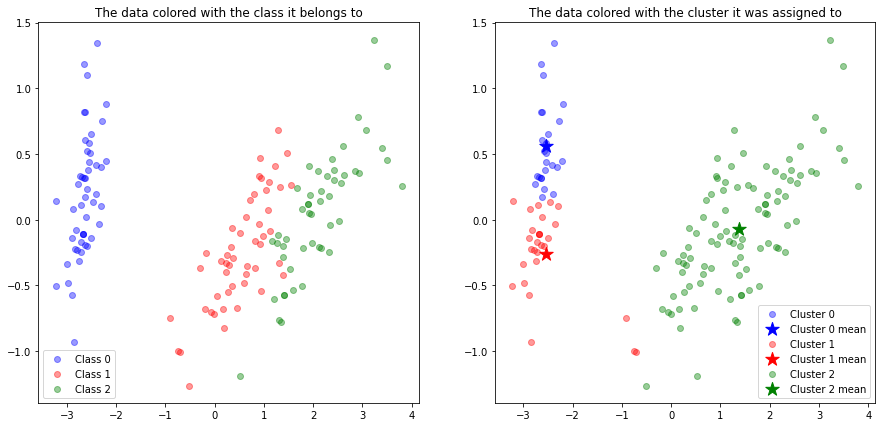

In [9]:

fig,axs = plt.subplots(1,2,figsize=(15,7))
colors = ['b','r','g']

for i,unique_class in enumerate(set(Y)):
    x_this_class = X[Y==unique_class]
    axs[0].scatter(x_this_class[:,0],x_this_class[:,1],label='Class %d'%unique_class,c=colors[i],alpha=0.4)
axs[0].legend()
axs[0].set_title("The data colored with the class it belongs to")

for i,cluster_index in enumerate(set(predicted_cluster_labels)):
    x_this_cluster = X[predicted_cluster_labels==cluster_index]
    axs[1].scatter(x_this_cluster[:,0],x_this_cluster[:,1],label='Cluster %d'%cluster_index,c=colors[i],alpha=0.4)
    axs[1].scatter(C[cluster_index,0],C[cluster_index,1],label='Cluster %d mean'%cluster_index,c=colors[i],marker='*',s=200)

axs[1].legend()
axs[1].set_title("The data colored with the cluster it was assigned to")

plt.show()
